# EDA and Data visualization


In [3]:
import pandas as pd
import numpy as np
import klib 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
def scatt(X,Y):
    sns.scatterplot(x=X, y=Y, data=data, color='red')

    # Linear regression line
    sns.regplot(x=X, y=Y, data=data, scatter=False, color='black')

    # Annotating points  > 4500
    for i in range(data.shape[0]):
        if data[X].iloc[i] > 4500:
            plt.text(data[X].iloc[i], 
                    data[Y].iloc[i], 
                    str(data.index[i]))

    # Customizing y-axis
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    plt.gca().set_yticks(np.arange(0, 800001, 100000))

    plt.xlabel(X)
    plt.ylabel(Y)
    plt.title(f'{Y} vs {X}')

    plt.show()


In [3]:
data = pd.read_csv('regression_dataset/train.csv')



In [4]:
data.head()

,Id,BuildingCategory,ZoningClassification,StreetLineLength,ParcelSize,RoadAccessType,AlleyAccessType,ParcelShape,TerrainFlatness,UtilityAvailability,...,PoolSize,PoolQuality,FenceQuality,AdditionalFeature,AdditionalFeatureValue,SaleMonth,SaleYear,SaleType,SaleCondition,OutcomeVariable
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   BuildingCategory        1460 non-null   int64  
 2   ZoningClassification    1460 non-null   object 
 3   StreetLineLength        1201 non-null   float64
 4   ParcelSize              1460 non-null   int64  
 5   RoadAccessType          1460 non-null   object 
 6   AlleyAccessType         91 non-null     object 
 7   ParcelShape             1460 non-null   object 
 8   TerrainFlatness         1460 non-null   object 
 9   UtilityAvailability     1460 non-null   object 
 10  ParcelSettings          1460 non-null   object 
 11  TerrainSlope            1460 non-null   object 
 12  District                1460 non-null   object 
 13  RoadProximity1          1460 non-null   object 
 14  RoadProximity2          1460 non-null   

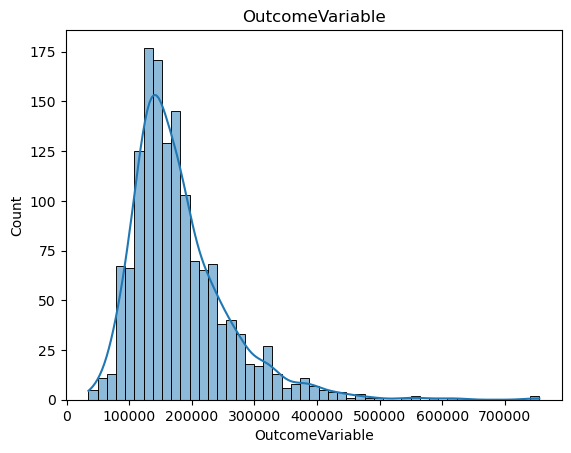

In [6]:
sns.histplot(data['OutcomeVariable'], kde=True)
plt.title('OutcomeVariable')
plt.show()

As we can see, the sale prices are right skewed. This was expected as few people can afford very expensive houses. We will keep this in mind, and take measures before modeling

In [7]:
data.describe()

,Id,BuildingCategory,StreetLineLength,ParcelSize,MaterialQuality,ConditionRating,ConstructionYear,RenovationYear,MasonrySize,BasementFinishedArea1,...,WoodDeckArea,OpenPorchArea,EnclosedPorchArea,ThreeSeasonPorchArea,ScreenPorchArea,PoolSize,AdditionalFeatureValue,SaleMonth,SaleYear,OutcomeVariable
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
data['BuildingCategory'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

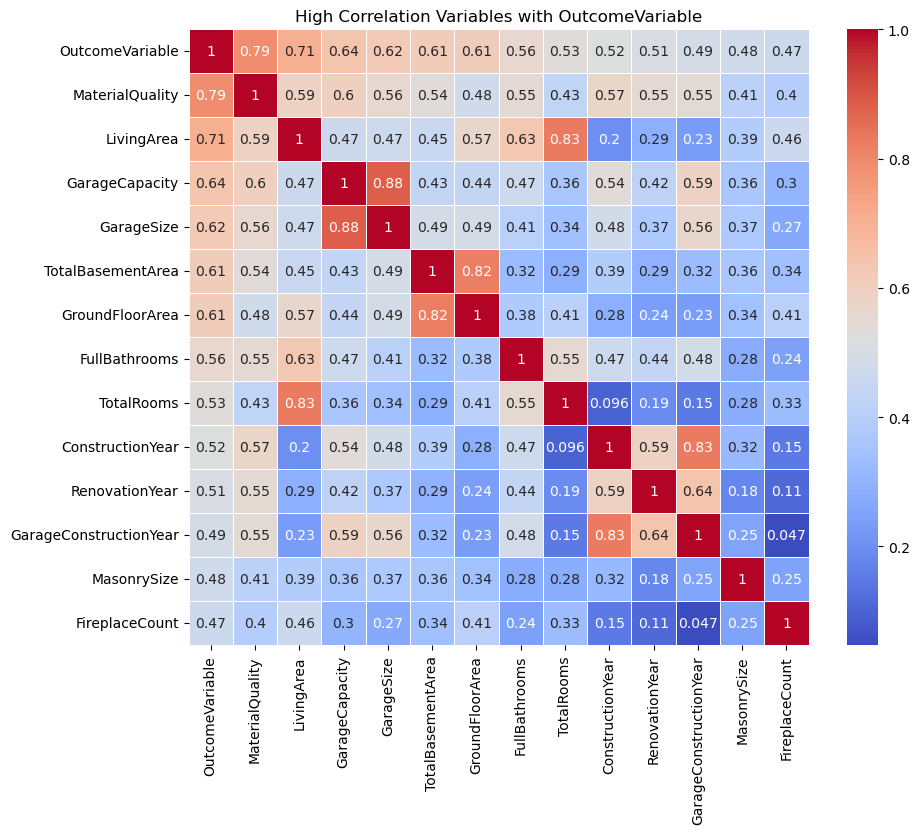

In [9]:
# Selecting numeric variables
numeric_vars = data.select_dtypes(include=[np.number])
numeric_var_names = numeric_vars.columns.tolist()

# Correlations of all numeric variables
cor_num_var = numeric_vars.corr()

# Sort on decreasing correlations with OutcomeVariable
cor_sorted = cor_num_var['OutcomeVariable'].abs().sort_values(ascending=False)

# Select only high correlations
cor_high = cor_sorted[cor_sorted > 0.4].index
cor_num_var_high = cor_num_var.loc[cor_high, cor_high]

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(cor_num_var_high, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('High Correlation Variables with OutcomeVariable')
plt.show()


We have 38 numerical variables in our dataset .Altogether, there are 10 numeric variables with a correlation of at least 0.5 with OutcomeVariable. All those correlations are positive. As from the correlation matrix plot, we can see that MaterialQuality, LivingArea, GarageCapacity are highly correlated with the OutcomeVariable. We have to keep in mind about multicollinearity. 
For example: the correlation between GarageCapacity and GarageSize is very high (0.89), and both have similar (high) correlations with OutcomeVariable.


## MaterialQuality

Overall Quality has the highest correlation with SalePrice among the numeric variables (0.79). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent).

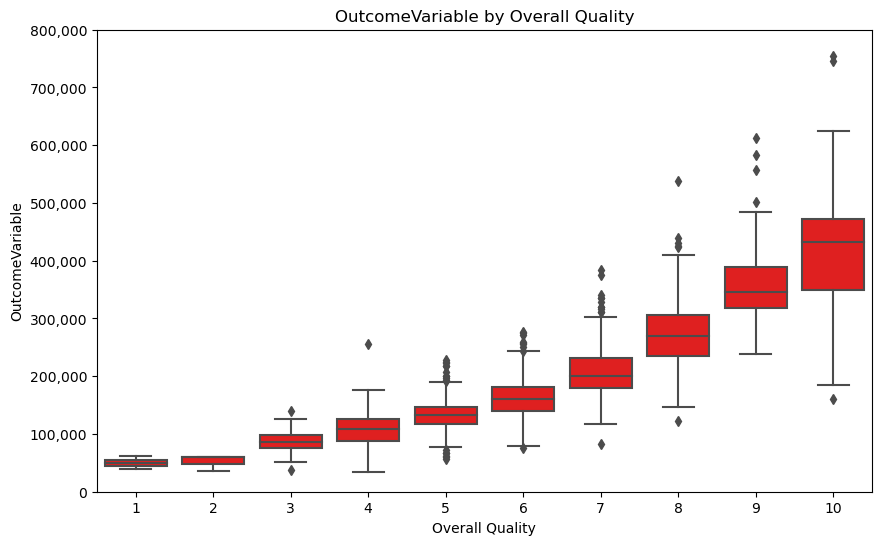

In [10]:
# Filter out rows where OutcomeVariable is NA
filtered_data = data[~data['OutcomeVariable'].isna()]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaterialQuality', y='OutcomeVariable', data=filtered_data, color='red')
plt.xlabel('Overall Quality')
plt.ylabel('OutcomeVariable')
plt.ylim(0, 800000)
plt.yticks(ticks=range(0, 800001, 100000), labels=['{:,}'.format(i) for i in range(0, 800001, 100000)])
plt.title('OutcomeVariable by Overall Quality')
plt.show()


The positive correlation is certainly there indeed, and seems to be a slightly upward curve. Regarding outliers, we do not see any extreme values. If there is a candidate to take out as an outlier later on, it seems to be the expensive house with grade 4.

## LivingArea

The numeric variable with the second highest correlation with OutcomeVariable is the LivingArea . This make a lot of sense big houses are generally more expensive.

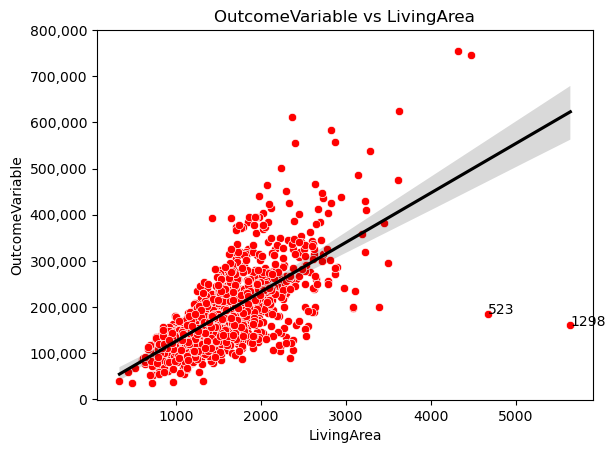

In [11]:
scatt('LivingArea','OutcomeVariable')

Especially the two houses with really big living areas and low OutcomeVariable seem outliers (houses 523 and 1298, see labels in graph). we will not take them out yet, as taking outliers can be dangerous. For instance, a low score on the MaterialQuality could explain a low price. However, as we can see below, these two houses actually also score maximum points on Matierial Quality. Therefore, we will keep houses 1298 and 523 in mind as prime candidates to take out as outliers.

In [12]:
a_outlr = data.loc[[523, 1298], ['OutcomeVariable', 'LivingArea', 'MaterialQuality']]
print(a_outlr)


      OutcomeVariable  LivingArea  MaterialQuality
523            184750        4676               10
1298           160000        5642               10


## GarageCapacity

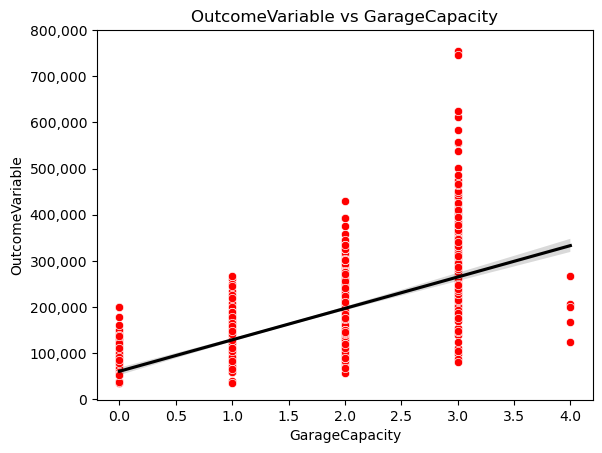

In [13]:

scatt('GarageCapacity','OutcomeVariable')

As we can see, if there in no garage for cars then the price is low. With the increase of GarageCapicity, Outcomevariable increases.